# Práctica 3
## Ejercicio 2

### Modelo sin intercepto
Se ajusta un modelo de la forma: $f(x|\beta) = \beta_1 x$ a los datos $(x_i,y_i)$'s $\forall i=0,1,\dots,m$.

Obs: En este caso se elige $\phi_1(x) =x$ y no hay $\phi_0$ por lo que sólo se tiene que estimar $\beta_1$.

**Ejercicio**: realizar el ajuste correspondiente para este caso con polyfit de numpy y con QR.

---

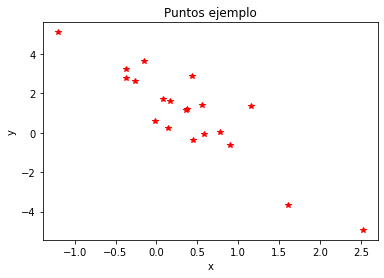

In [16]:
import numpy as np
import matplotlib.pyplot as plt 
from pprint import pprint
np.set_printoptions(precision = 2) #sólo dos decimales que se muestren
np.random.seed(1989) #para reproducibilidad
mpoints = 20
x = np.random.randn(mpoints) 
y = -3*x + np.random.normal(2,1,mpoints)
plt.plot(x,y, 'r*')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Puntos ejemplo')
plt.show()

---
## Factorización QR

In [121]:
#Con intercepto
A_con = np.ones((mpoints, 2))
A_con[:,1] = x 
Q_con, R_con = np.linalg.qr(A_con) 
beta_con = np.linalg.solve(R_con,Q_con.T@y)
y_ajustadas_con_intercepto = A_con@beta_con
# Modelo sin intercepto
A_sin = np.empty([mpoints, 1]) 
A_sin[:,0] = x 
Q_sin, R_sin = np.linalg.qr(A_sin)
beta_sin = np.linalg.solve(R_sin,Q_sin.T@y)
y_ajustadas_sin_intercepto = A_sin@beta_sin 
pprint(y_ajustadas_con_intercepto)
pprint(y_ajustadas_sin_intercepto)

array([ 2.73,  1.8 ,  0.89, -0.35,  0.55,  0.86,  1.03,  2.43, -0.03,
        2.09, -2.23,  3.  ,  1.09,  1.58, -4.65,  1.66, -1.05,  0.47,
        5.22,  3.02])
array([ 0.42, -0.14, -0.69, -1.43, -0.89, -0.7 , -0.6 ,  0.24, -1.24,
        0.04, -2.57,  0.59, -0.57, -0.27, -4.02, -0.22, -1.85, -0.94,
        1.92,  0.59])


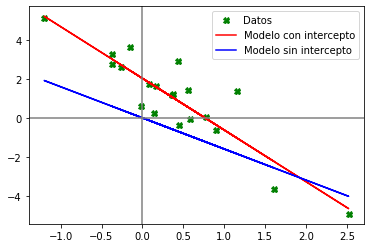

In [122]:
plt.plot(x,y, 'gX')
plt.plot(x, y_ajustadas_con_intercepto, 'r-', x, y_ajustadas_sin_intercepto, 'b-')
plt.axhline(y=0, linestyle='-', color='grey'), plt.axvline(x=0, linestyle='-', color='grey')

plt.legend(('Datos', 'Modelo con intercepto', 'Modelo sin intercepto'), loc='best')
plt.show()

---
## Ejercicio: calcular el ECM de los ajustes anteriores.

Si $\hat{y}_i$ es el valor ajustado para el dato $x_i$, esto es: $\hat{y}_i = f(x_i|\hat{\beta}) = \displaystyle \sum_{i=0}^m \left (y_i -\displaystyle \sum_{j=0}^n\hat{\beta}_j\phi_j(x_i)\right )^2$ el residual $i$ es: $r_i = y_i - \hat{y}_i$ y representa la discrepancia entre los datos y el modelo.

El error cuadrático medio se calcula como: $$ECM(\hat{y}) = \displaystyle \sum_{i=0}^m(y_i-\hat{y}_i)^2$$

In [123]:
ecm = lambda y, _y: sum( (y - _y)**2 )

In [125]:
print("con intercepto:",y_ajustadas_con_intercepto)
print("sin intercepto:",y_ajustadas_sin_intercepto)
ecm_con_intercepto = ecm(y, y_ajustadas_con_intercepto)
ecm_sin_intercepto = ecm(y, y_ajustadas_sin_intercepto)

con intercepto: [ 2.73  1.8   0.89 -0.35  0.55  0.86  1.03  2.43 -0.03  2.09 -2.23  3.
  1.09  1.58 -4.65  1.66 -1.05  0.47  5.22  3.02]
sin intercepto: [ 0.42 -0.14 -0.69 -1.43 -0.89 -0.7  -0.6   0.24 -1.24  0.04 -2.57  0.59
 -0.57 -0.27 -4.02 -0.22 -1.85 -0.94  1.92  0.59]


In [126]:
print("ECM con intercepto:", ecm_con_intercepto)
print("ECM sin intercepto:", ecm_sin_intercepto)

ECM con intercepto: 20.435476838775887
ECM sin intercepto: 86.26514118733563


---
$$f_1(x|\beta) = \beta_0 + \beta_1 \frac{x}{x+1}$$
$$f_2(x|\beta) = \beta_0 + \beta_1x + \beta_2x^2$$
$$f_3(x|\beta) = \beta_0 + \beta_1\text{log}(x+1)$$

### Ejercicio: ajustar el modelo 3. Calcular ECM de cada modelo y realizar en una sola gráfica los tres modelos. ¿Cuál es el modelo con menor ECM?

In [151]:
#Datos
datos = np.loadtxt('datos_minimos_cuadrados.txt', skiprows=1)
x = datos[:, 0]
y = datos[:, 1]

### Modelo 1
$$f_1(x|\beta) = \beta_0 + \beta_1 \frac{x}{x+1}$$

In [152]:
phi_1 = lambda var: var/(var+1)
mpoints, = x.shape
A = np.ones((mpoints,2))
A[:,1] = phi_1(x) 
Q,R = np.linalg.qr(A)
beta = np.linalg.solve(R,Q.T@y)
y_estimadas_modelo_1 = A@beta 
# ECM:
ecm_modelo_1 = ecm(y, y_estimadas_modelo_1)

### Modelo 2
$$f_2(x|\beta) = \beta_0 + \beta_1x + \beta_2x^2$$

In [153]:
coeficientes = np.polyfit(x,y,2)
y_estimadas_modelo_2 = coeficientes[2] + coeficientes[1] * x + coeficientes[0] * x**2

ecm_modelo_2 = ecm(y, y_estimadas_modelo_2)

### Modelo 3
$$f_3(x|\beta) = \beta_0 + \beta_1\text{log}(x+1)$$

In [154]:
phi1_m3 = lambda var: np.log(var+1)
mpoints, = x.shape
A = np.ones((mpoints, 2))
A[:, 1] = phi1_m3(x) # evaluamos phi1 en x para la segunda columna
Q,R = np.linalg.qr(A)
beta = np.linalg.solve(R, Q.T@y)
y_estimadas_modelo_3 = A@beta
# ECM:
ecm_modelo_3 = ecm(y, y_estimadas_modelo_3)

### Gráfica y conclusiones


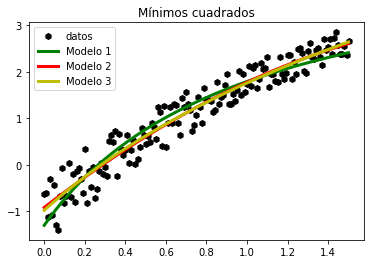

In [180]:
plt.plot(x, y, 'kh',
         x, y_estimadas_modelo_1,'g-',
         x, y_estimadas_modelo_2,'r-',
         x, y_estimadas_modelo_3,'y-',
         linewidth=3.0
)
plt.legend(['datos', 'Modelo 1', 'Modelo 2', 'Modelo 3'], loc='best')
plt.title('Mínimos cuadrados')
plt.show()

In [177]:
print("ECM Modelo 1:", ecm_modelo_1)
print("ECM Modelo 2:", ecm_modelo_2)
print("ECM Modelo 3:", ecm_modelo_3)


ECM Modelo 1: 14.656071440340158
ECM Modelo 2: 11.974386376666112
ECM Modelo 3: 12.041297818937315


## El modelo con menor ecm es el modelo 2